$\newcommand{\bkt}[1]{\left(#1\right)}$

# $t$ distribution

A random variable $T$ follows a $t$ dsitribution with $n$ degrees of freedom, if $T = \dfrac{\bar{X}-\mu}{S/\sqrt{n}}$, where $\bar{X}$ is the sample mean and $S$ is the sample variance both estimated from the data, i.e., if $X_i \sim \mathcal{N}\bkt{\mu,\sigma^2}$, then
$$\bar{X} = \dfrac{X_1+X_2+\cdots+X_n}n$$
and
$$S^2 = \dfrac{\bkt{X_1-\mu}^2+\bkt{X_2-\mu}^2+\cdots+\bkt{X_n-\mu}^2}{n-1}$$

The probability density function (PDF) of a $t$ random variable with $n$ degrees of freedom is given by
$$f_T(t) = \dfrac1{\sqrt{n} B \bkt{\frac12,\frac{n}2}} \bkt{1+\dfrac{t^2}n}^{-\bkt{\frac{n+1}2}}$$

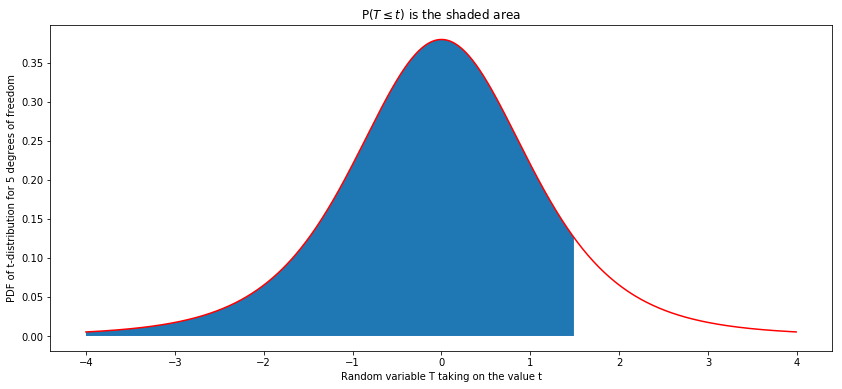

In [7]:
import scipy as sp;
import scipy.stats as stats
import scipy.integrate as integrate;

# Writing the Gaussian cdf to markdown
file_m = open("t_markdown.txt","w");
file_l   = open("t_latex.txt","w");
X = sp.asarray([0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.10,0.05,0.025,0.01,0.005,0.0005]);
# Y = sp.around(, decimals=5);
for n in sp.linspace(1,50,50):
    Y=sp.around(stats.t.ppf(1-X,n),decimals=5);
    file_m.write('| ')
    file_m.write(str(int(n)));
    file_m.write(' | ')
    file_l.write(str(int(n)));
    file_l.write(' & ')
    for k in range(0,X.size-1):
        file_m.write(str(Y[k]));
        file_m.write(' | ');
        file_l.write(str(Y[k]));
        file_l.write(' & ');

    file_m.write(str(Y[X.size-1]));
    file_m.write(' |');
    file_l.write(str(Y[X.size-1]));
    
    file_m.write('\n');
    file_l.write(' \\\\\n');

file_m.close()
file_l.close()

import matplotlib.pyplot as plt

n = 5;
x = sp.arange(-4, 1.5, 0.01)
y = 1/sp.sqrt(n)/sp.special.beta(1/2,n/2)*(1+x*x/n)**(-(n+1)/2);
X = sp.arange(-4, 4, 0.01)
Y = 1/sp.sqrt(n)/sp.special.beta(1/2,n/2)*(1+X*X/n)**(-(n+1)/2);
fig, (ax) = plt.subplots(1, 1, sharex=True)

ax.fill_between(x, 0, y);
ax.plot(X,Y,'r-');
ax.set_xlabel('Random variable T taking on the value t')
ax.set_ylabel('PDF of t-distribution for 5 degrees of freedom')
ax.set_title('P($T \leq t$) is the shaded area')
plt.rcParams["figure.figsize"] = [14,6];
plt.show()

## $t$ Cumulative Distribution

The table below gives that value of $t$ such that $p=P(T \geq t)$, where $T$ is the $t$ random variable with $n$ degrees of freedom.

|n | 0.45 | 0.4 | 0.35 | 0.3 | 0.25 | 0.2 | 0.15 | 0.10 | 0.05 | 0.025 | 0.01 | 0.005 | 0.0005 |
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
| 1 | 0.15838 | 0.32492 | 0.50953 | 0.72654 | 1.0 | 1.37638 | 1.96261 | 3.07768 | 6.31375 | 12.7062 | 31.82052 | 63.65674 | 636.61925 |
| 2 | 0.14213 | 0.28868 | 0.44475 | 0.61721 | 0.8165 | 1.06066 | 1.38621 | 1.88562 | 2.91999 | 4.30265 | 6.96456 | 9.92484 | 31.59905 |
| 3 | 0.1366 | 0.27667 | 0.4242 | 0.58439 | 0.76489 | 0.97847 | 1.24978 | 1.63774 | 2.35336 | 3.18245 | 4.5407 | 5.84091 | 12.92398 |
| 4 | 0.13383 | 0.27072 | 0.41416 | 0.56865 | 0.7407 | 0.94096 | 1.18957 | 1.53321 | 2.13185 | 2.77645 | 3.74695 | 4.60409 | 8.6103 |
| 5 | 0.13218 | 0.26718 | 0.40823 | 0.55943 | 0.72669 | 0.91954 | 1.15577 | 1.47588 | 2.01505 | 2.57058 | 3.36493 | 4.03214 | 6.86883 |
| 6 | 0.13108 | 0.26483 | 0.40431 | 0.55338 | 0.71756 | 0.9057 | 1.13416 | 1.43976 | 1.94318 | 2.44691 | 3.14267 | 3.70743 | 5.95882 |
| 7 | 0.13029 | 0.26317 | 0.40154 | 0.54911 | 0.71114 | 0.89603 | 1.11916 | 1.41492 | 1.89458 | 2.36462 | 2.99795 | 3.49948 | 5.40788 |
| 8 | 0.12971 | 0.26192 | 0.39947 | 0.54593 | 0.70639 | 0.88889 | 1.10815 | 1.39682 | 1.85955 | 2.306 | 2.89646 | 3.35539 | 5.04131 |
| 9 | 0.12925 | 0.26096 | 0.39787 | 0.54348 | 0.70272 | 0.8834 | 1.09972 | 1.38303 | 1.83311 | 2.26216 | 2.82144 | 3.24984 | 4.78091 |
| 10 | 0.12889 | 0.26018 | 0.39659 | 0.54153 | 0.69981 | 0.87906 | 1.09306 | 1.37218 | 1.81246 | 2.22814 | 2.76377 | 3.16927 | 4.58689 |
| 11 | 0.12859 | 0.25956 | 0.39555 | 0.53994 | 0.69745 | 0.87553 | 1.08767 | 1.36343 | 1.79588 | 2.20099 | 2.71808 | 3.10581 | 4.43698 |
| 12 | 0.12835 | 0.25903 | 0.39469 | 0.53862 | 0.69548 | 0.87261 | 1.08321 | 1.35622 | 1.78229 | 2.17881 | 2.681 | 3.05454 | 4.31779 |
| 13 | 0.12814 | 0.25859 | 0.39396 | 0.5375 | 0.69383 | 0.87015 | 1.07947 | 1.35017 | 1.77093 | 2.16037 | 2.65031 | 3.01228 | 4.22083 |
| 14 | 0.12796 | 0.25821 | 0.39333 | 0.53655 | 0.69242 | 0.86805 | 1.07628 | 1.34503 | 1.76131 | 2.14479 | 2.62449 | 2.97684 | 4.14045 |
| 15 | 0.12781 | 0.25789 | 0.39279 | 0.53573 | 0.6912 | 0.86624 | 1.07353 | 1.34061 | 1.75305 | 2.13145 | 2.60248 | 2.94671 | 4.07277 |
| 16 | 0.12767 | 0.2576 | 0.39232 | 0.53501 | 0.69013 | 0.86467 | 1.07114 | 1.33676 | 1.74588 | 2.11991 | 2.58349 | 2.92078 | 4.015 |
| 17 | 0.12755 | 0.25735 | 0.3919 | 0.53438 | 0.6892 | 0.86328 | 1.06903 | 1.33338 | 1.73961 | 2.10982 | 2.56693 | 2.89823 | 3.96513 |
| 18 | 0.12745 | 0.25712 | 0.39153 | 0.53382 | 0.68836 | 0.86205 | 1.06717 | 1.33039 | 1.73406 | 2.10092 | 2.55238 | 2.87844 | 3.92165 |
| 19 | 0.12735 | 0.25692 | 0.3912 | 0.53331 | 0.68762 | 0.86095 | 1.06551 | 1.32773 | 1.72913 | 2.09302 | 2.53948 | 2.86093 | 3.88341 |
| 20 | 0.12727 | 0.25674 | 0.39091 | 0.53286 | 0.68695 | 0.85996 | 1.06402 | 1.32534 | 1.72472 | 2.08596 | 2.52798 | 2.84534 | 3.84952 |
| 21 | 0.12719 | 0.25658 | 0.39064 | 0.53246 | 0.68635 | 0.85907 | 1.06267 | 1.32319 | 1.72074 | 2.07961 | 2.51765 | 2.83136 | 3.81928 |
| 22 | 0.12712 | 0.25643 | 0.39039 | 0.53208 | 0.68581 | 0.85827 | 1.06145 | 1.32124 | 1.71714 | 2.07387 | 2.50832 | 2.81876 | 3.79213 |
| 23 | 0.12706 | 0.2563 | 0.39017 | 0.53175 | 0.68531 | 0.85753 | 1.06034 | 1.31946 | 1.71387 | 2.06866 | 2.49987 | 2.80734 | 3.76763 |
| 24 | 0.127 | 0.25617 | 0.38997 | 0.53144 | 0.68485 | 0.85686 | 1.05932 | 1.31784 | 1.71088 | 2.0639 | 2.49216 | 2.79694 | 3.7454 |
| 25 | 0.12694 | 0.25606 | 0.38978 | 0.53115 | 0.68443 | 0.85624 | 1.05838 | 1.31635 | 1.70814 | 2.05954 | 2.48511 | 2.78744 | 3.72514 |
| 26 | 0.12689 | 0.25595 | 0.38961 | 0.53089 | 0.68404 | 0.85567 | 1.05752 | 1.31497 | 1.70562 | 2.05553 | 2.47863 | 2.77871 | 3.70661 |
| 27 | 0.12685 | 0.25586 | 0.38945 | 0.53065 | 0.68368 | 0.85514 | 1.05673 | 1.3137 | 1.70329 | 2.05183 | 2.47266 | 2.77068 | 3.68959 |
| 28 | 0.12681 | 0.25577 | 0.3893 | 0.53042 | 0.68335 | 0.85465 | 1.05599 | 1.31253 | 1.70113 | 2.04841 | 2.46714 | 2.76326 | 3.67391 |
| 29 | 0.12677 | 0.25568 | 0.38916 | 0.53021 | 0.68304 | 0.85419 | 1.0553 | 1.31143 | 1.69913 | 2.04523 | 2.46202 | 2.75639 | 3.65941 |
| 30 | 0.12673 | 0.25561 | 0.38903 | 0.53002 | 0.68276 | 0.85377 | 1.05466 | 1.31042 | 1.69726 | 2.04227 | 2.45726 | 2.75 | 3.64596 |
| 31 | 0.1267 | 0.25553 | 0.38891 | 0.52984 | 0.68249 | 0.85337 | 1.05406 | 1.30946 | 1.69552 | 2.03951 | 2.45282 | 2.74404 | 3.63346 |
| 32 | 0.12666 | 0.25546 | 0.3888 | 0.52967 | 0.68223 | 0.853 | 1.0535 | 1.30857 | 1.69389 | 2.03693 | 2.44868 | 2.73848 | 3.6218 |
| 33 | 0.12663 | 0.2554 | 0.38869 | 0.5295 | 0.682 | 0.85265 | 1.05298 | 1.30774 | 1.69236 | 2.03452 | 2.44479 | 2.73328 | 3.61091 |
| 34 | 0.1266 | 0.25534 | 0.38859 | 0.52935 | 0.68177 | 0.85232 | 1.05248 | 1.30695 | 1.69092 | 2.03224 | 2.44115 | 2.72839 | 3.60072 |
| 35 | 0.12658 | 0.25528 | 0.3885 | 0.52921 | 0.68156 | 0.85201 | 1.05202 | 1.30621 | 1.68957 | 2.03011 | 2.43772 | 2.72381 | 3.59115 |
| 36 | 0.12655 | 0.25523 | 0.38841 | 0.52908 | 0.68137 | 0.85172 | 1.05158 | 1.30551 | 1.6883 | 2.02809 | 2.43449 | 2.71948 | 3.58215 |
| 37 | 0.12653 | 0.25518 | 0.38833 | 0.52895 | 0.68118 | 0.85144 | 1.05117 | 1.30485 | 1.68709 | 2.02619 | 2.43145 | 2.71541 | 3.57367 |
| 38 | 0.1265 | 0.25513 | 0.38825 | 0.52883 | 0.681 | 0.85118 | 1.05077 | 1.30423 | 1.68595 | 2.02439 | 2.42857 | 2.71156 | 3.56568 |
| 39 | 0.12648 | 0.25508 | 0.38817 | 0.52871 | 0.68083 | 0.85094 | 1.0504 | 1.30364 | 1.68488 | 2.02269 | 2.42584 | 2.70791 | 3.55812 |
| 40 | 0.12646 | 0.25504 | 0.3881 | 0.52861 | 0.68067 | 0.8507 | 1.05005 | 1.30308 | 1.68385 | 2.02108 | 2.42326 | 2.70446 | 3.55097 |
| 41 | 0.12644 | 0.255 | 0.38803 | 0.5285 | 0.68052 | 0.85048 | 1.04971 | 1.30254 | 1.68288 | 2.01954 | 2.4208 | 2.70118 | 3.54418 |
| 42 | 0.12642 | 0.25496 | 0.38797 | 0.5284 | 0.68038 | 0.85026 | 1.04939 | 1.30204 | 1.68195 | 2.01808 | 2.41847 | 2.69807 | 3.53775 |
| 43 | 0.12641 | 0.25492 | 0.38791 | 0.52831 | 0.68024 | 0.85006 | 1.04908 | 1.30155 | 1.68107 | 2.01669 | 2.41625 | 2.6951 | 3.53163 |
| 44 | 0.12639 | 0.25488 | 0.38785 | 0.52822 | 0.68011 | 0.84987 | 1.04879 | 1.30109 | 1.68023 | 2.01537 | 2.41413 | 2.69228 | 3.5258 |
| 45 | 0.12637 | 0.25485 | 0.38779 | 0.52814 | 0.67998 | 0.84968 | 1.04852 | 1.30065 | 1.67943 | 2.0141 | 2.41212 | 2.68959 | 3.52025 |
| 46 | 0.12636 | 0.25482 | 0.38774 | 0.52805 | 0.67986 | 0.84951 | 1.04825 | 1.30023 | 1.67866 | 2.0129 | 2.41019 | 2.68701 | 3.51496 |
| 47 | 0.12634 | 0.25479 | 0.38768 | 0.52798 | 0.67975 | 0.84934 | 1.048 | 1.29982 | 1.67793 | 2.01174 | 2.40835 | 2.68456 | 3.5099 |
| 48 | 0.12633 | 0.25476 | 0.38763 | 0.5279 | 0.67964 | 0.84917 | 1.04775 | 1.29944 | 1.67722 | 2.01063 | 2.40658 | 2.6822 | 3.50507 |
| 49 | 0.12631 | 0.25473 | 0.38759 | 0.52783 | 0.67953 | 0.84902 | 1.04752 | 1.29907 | 1.67655 | 2.00958 | 2.40489 | 2.67995 | 3.50044 |
| 50 | 0.1263 | 0.2547 | 0.38754 | 0.52776 | 0.67943 | 0.84887 | 1.04729 | 1.29871 | 1.67591 | 2.00856 | 2.40327 | 2.67779 | 3.49601 |